# PS04: CLT and hypothesis testing
## Name: Kaylee Cho
### Date: 2023/04/29

### 1) Explore Central Limit Theorem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import pandas as pd
from scipy import stats

In [4]:
np.random.seed(0)
X = np.random.randint(0, 2, size=10)*2 - 1
X

array([-1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

**1) What is a random varialbe(RV)? What makes X a RV?**
\
Random variable(RV) is a variable that assumes numerical values associated with the random outcomes of an experiment, where only one numerical value is assigned to each smaple point. To understang what X is here, we can think of an experiment where a coin is tossed three times. Since the number range on the exmaple above doesn't make sense because it contains negative numbers, if we think of it as positive number, X represents the number of times that the coin comes up heads, then X is a discrete random variable that can only have the values 0, 1, 2, or 3.
Also in this case, the randint() method returns an integer number selected element from the specified range and the random method selects random numbers within the range of number selected.

**2) Calculate the expected value and variance of this random variable. Explain what is the difference between expected value and the sample mean.**

In [32]:
# expected value calculation E[X] = sigma (p * X(i))
expected_value = (-1 + 1) * 0.5
print("Expected Value:", expected_value)
# variance calculation: var(X) = E[X^2] - (E[x])^2
expected_value_sq = ((-1) ** 2 + (1) ** 2) * 0.5
variance = expected_value_sq - (expected_value ** 2)
print("Variance:", variance)

Expected Value: 0.0
Variance: 1.0


The difference between expected value and sample mean is that the expected value is a property of a random variable while the sample mean is calculated from a sample of the random variable. For 
instance, sample mean is random and it fluctuates depending on what is sampled. Bu 
expectation is constant and does not change. Say, tossing coin a few times may resu t
in a different mean, but the expected number of heads is always 0.5

**3) Choose your number of repetitions R. 1000 is a good number but you can also take 10,000 or 100,000 to get smoother histograms.**
\
*(Note: Number of repititions R is not the same as sample size S here. You will create samples of size S for R times below. For instance, you will create R = 10000 times a sample of size S = 10.)*

In [29]:
R = 1000
# I will take this as my R value!

**4) Create a vector of R random realizations of X. Make a histogram of those. Comment the shape of the histogram.**
\
*Note: in this case we have R = 1000 repetitions and samples are of size S = 1 as we look at individual realizations.*

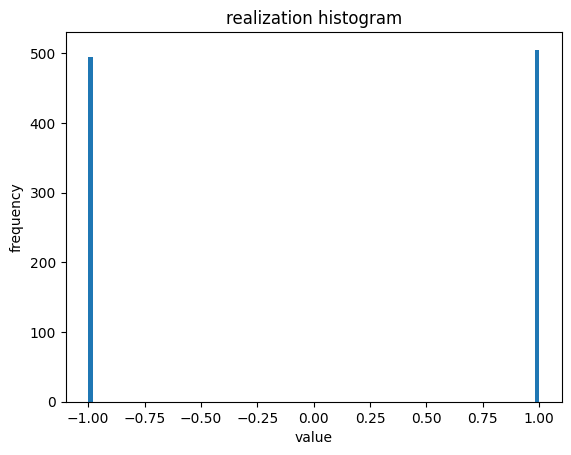

In [11]:
np.random.seed(0)
X = np.random.randint(0, 2, size=1)*2 - 1
R = 1000
# Generate matrix of random realizations
realizations = np.random.randint(0, 2, size=(R,1))*2 - 1
#Plot histogram of realizations
_ = plt.hist(realizations.flatten(), bins=100)
_ = plt.title("realization histogram")
_ = plt.xlabel("value")
_ = plt.ylabel("frequency")
_ = plt.show()

Comment: 
\
The histogram has 2 bins and shows the frequency of each value of the randomly generated realizations. This contains both value of -1 and 1. Both values are around 5000 frequency!
\
Also, flatten() method in Python is used to return a copy of a given array in such a way that it is collapsed into one dimension.

**5) Compute and report mean and variance of the sample you created (just use np.mean and np.var).**

In [15]:
np.random.seed(0)
X = np.random.randint(0, 2, size=10)*2 - 1
mean = np.mean(X)
var = np.var(X)
print("mean:", mean, "variance", var)

mean: 0.6 variance 0.6400000000000002


**6) Now create R pairs of random realizations of X (i.e. sample size S=2). For each pair, compute its mean. You should have R mean values. Make the histogram. How does this look like?**

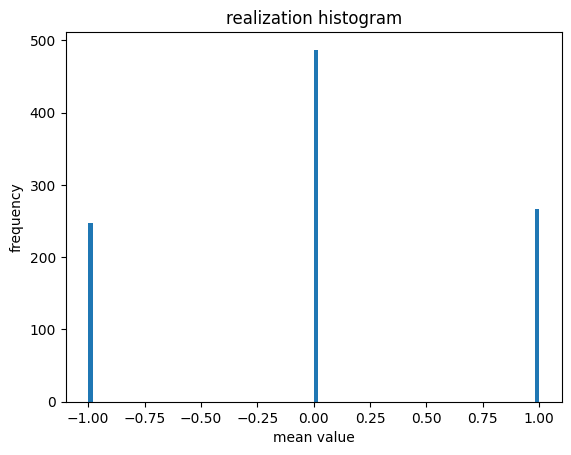

In [23]:
np.random.seed(0)
R = 1000
mean = []
# Generate matrix of random realizations
for i in range(1000):
    realizations = np.random.randint(0, 2, size=2)*2 - 1
    # Compute mean of each pair of realizations
    means = np.mean(realizations)
    mean.append(means)
#Plot histogram of realizations
_ = plt.hist(mean, bins=100)
_ = plt.title("realization histogram")
_ = plt.xlabel("mean value")
_ = plt.ylabel("frequency")
_ = plt.show()

Comment: The shape of the histogram looks similar to the graph above, but the values of x axis and y axis are now different. The x axis here represents the mean value and y axis represents the frequency of the mean value calculated from the realization based on 1000 repetition trials.

**7) Compute and report mean of the R pair means, and variance of the means. NB! we talk about sample mean and sample variance again, where sample is your sample of R pair means.**

In [76]:
np.random.seed(0)
X = np.random.randint(0, 2, size=1)*2 - 1
R = 1000
# Generate matrix of random realizations
realizations = np.random.randint(0, 2, size=(R,2))*2 - 1
# Compute mean of each pair of realizations
means = np.mean(realizations, axis=1)
mean_of_means = np.mean(means)
var_of_means = np.var(means)
print("mean of means", mean_of_means, "| variance of means", var_of_means)

mean of means 0.02 | variance of means 0.4716


**8) Compute the expected value and variance of the pair means, i.e. the theoretical  concepts. This mirrors what you did in 2. \
Compare the theoretical values with the sample values above. Are those fairly similar? Note that according to CLT, the variance of a pair mean should be just 1/2 of what you got above as for pairs S = 2.**

In [35]:
# expected value calculation E[X]
# count number of each X
minus_count = mean.count(-1)
zero_count = mean.count(0)
one_count = mean.count(1)
# calculate probability of each X
p_minus = 1/4
p_zero = 1/2
p_one = 1/4
# calculate expected value
expected_value = (- 1 * p_minus) + (0 * p_zero) + (1 * p_one)
print("Expected Value:", expected_value)
# variance calculation Var(X) = E[X^2] - (E[X])^2
var_x = (1 * p_minus) + (0 * p_zero) + (1 * p_one) - (expected_value ** 2)
print("Variance:", var_x)

Expected Value: 0.0
Variance: 0.5


**9) Now instead of pairs of random numbers, repeat this with 5-tuples of random numbers (i.e. S=5 random numbers per one repetition, and still the same R = 1000 or whatever you chose repetitions in total). Compare the theoretical and sample version of mean and variance of 5-tuples. Are they similar? Do you spot any noticeable differences in the histogram compared to your previous histogram?**

mean of means 0.0176 | variance of means 0.20545024


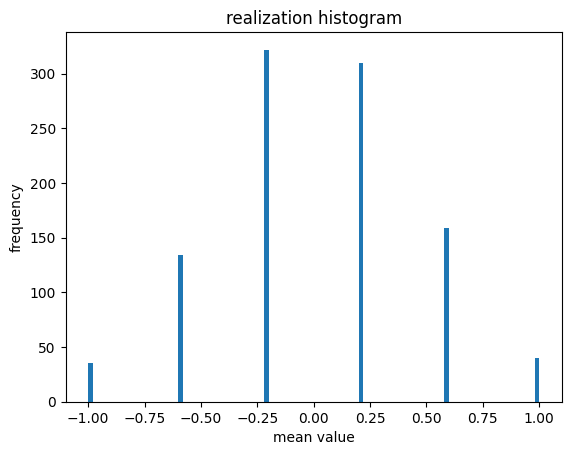

In [58]:
np.random.seed(0)
R = 1000
# Generate matrix of random realizations
realizations = np.random.randint(0, 2, size=(R,5))*2 - 1
# Compute mean of each pair of realizations
means = np.mean(realizations, axis=1)
mean_of_means = np.mean(means)
var_of_means = np.var(means)
print("mean of means", mean_of_means, "| variance of means", var_of_means)
#Plot histogram of realizations
_ = plt.hist(means, bins=100)
_ = plt.title("realization histogram")
_ = plt.xlabel("mean value")
_ = plt.ylabel("frequency")
_ = plt.show()

In [69]:
# expected value calculation E[X]
# count number of each X
point_two = np.count_nonzero(means == 0.2)
point_six = np.count_nonzero(means == 0.6)
one = np.count_nonzero(means == 1.0)
point_minus_two = np.count_nonzero(means == -0.2)
point_minus_six = np.count_nonzero(means == -0.6)
one_minus = np.count_nonzero(means == -1.0)
# calculate probability of each X
prob_point_two = point_two / 1000
prob_point_six = point_six / 1000
prob_one = one / 1000
prob_point_minus_two = point_minus_two / 1000
prob_point_minus_six = point_minus_six / 1000
prob_one_minus = one_minus / 1000
# calculate expected value
expected_value = (0.2 * prob_point_two) + (0.6 * prob_point_six) + (1 * prob_one) + (-0.2 * prob_point_minus_two) + (-0.6 * prob_point_minus_six) + (-1 * prob_one_minus)
print("Expected Value:", expected_value)
# variance calculation Var(X) = E[X^2] - (E[X])^2
var_x = ((0.04) * prob_point_two) + ((0.36) * prob_point_six) + ((1) * prob_one) + ((0.04) * prob_point_minus_two) + ((0.36) * prob_point_minus_six) + ((1) * prob_one_minus) - (expected_value ** 2)
print("Variance:", var_x)

Expected Value: 0.017600000000000005
Variance: 0.20545024


Because we have five tuples as a sample, the histogram above becomes a graph with six bars and the fact that it goes from the range of -1 to 1 and the shape of the histogram is bell curved instead of having two spearate bars on each edge is the biggest difference.

**10) Repeat with 25 tuples...
\
(Also, compute the expectation and theoretical variance, and compare those with sample mean, sample variance)**

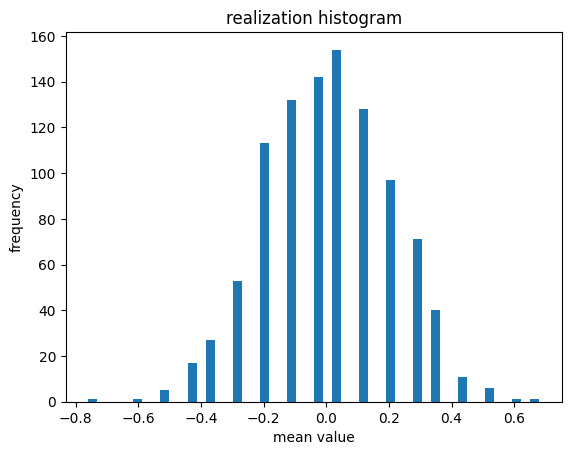

mean of means 0.00432 | variance of means 0.0411589376
Theoretical Variance: 0.04120013773773794
Theoretical expectation 0.004319999999999995


In [74]:
np.random.seed(0)
X = np.random.randint(0, 2, size=1)*2 - 1
R = 1000
# Generate matrix of random realizations (sample size = 25)
realizations = np.random.randint(0, 2, size=(R,25))*2 - 1
# Compute mean of each pair of realizations
means = np.mean(realizations, axis=1)
#Plot histogram of realizations
_ = plt.hist(means, bins=50)
_ = plt.title("realization histogram")
_ = plt.xlabel("mean value")
_ = plt.ylabel("frequency")
_ = plt.show()
# calculating sample mean, sample variance
mean_of_means = np.mean(means)
var_of_means = np.var(means)
print("mean of means", mean_of_means, "| variance of means", var_of_means)
# calculating theoretical variance
mean = sum(means)/len(means)
squared_diff = [(x - mean) ** 2 for x in means]
sum_squared_diff = sum(squared_diff)
variance = sum_squared_diff / (len(means) - 1)
print("Theoretical Variance:", variance)
# computing expectation (long term: mean)
mean = sum(means)/len(means)
print("Theoretical expectation", mean)

**11) ...and with 1000 tuples. Do not forget to compare with theoretical results.**

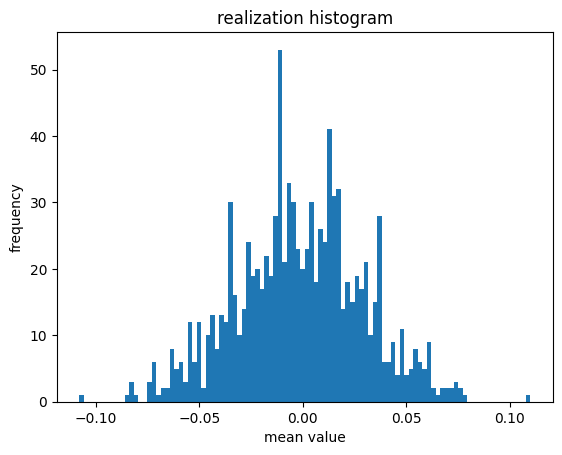

mean of means -0.001514 | variance of means 0.000964879804
Theoretical Variance: 0.0009658456496496428
Theoretical expectation -0.0015140000000000004


In [95]:
np.random.seed(0)
X = np.random.randint(0, 2, size=1)*2 - 1
R = 1000
# Generate matrix of random realizations (sample size = 25)
realizations = np.random.randint(0, 2, size=(R,1000))*2 - 1
# Compute mean of each pair of realizations
means = np.mean(realizations, axis=1)
#Plot histogram of realizations
_ = plt.hist(means, bins=100)
_ = plt.title("realization histogram")
_ = plt.xlabel("mean value")
_ = plt.ylabel("frequency")
_ = plt.show()
# calculating sample mean, sample variance
mean_of_means = np.mean(means)
var_of_means = np.var(means)
print("mean of means", mean_of_means, "| variance of means", var_of_means)
# calculating theoretical variance
mean = sum(means)/len(means)
squared_diff = [(x - mean) ** 2 for x in means]
sum_squared_diff = sum(squared_diff)
variance = sum_squared_diff / (len(means) - 1)
print("Theoretical Variance:", variance)
# computing expectation (long term: mean)
mean = sum(means)/len(means)
print("Theoretical expectation", mean)

As the tuple size increases, the shape of teh histogram becomes more bell curved and the distributions of the samples are not skewed in one part, but fairly evenly distributed compared to previous histograms with smaller tuple sizes.

**13) Explain why do the histograms resemble normal distribution as S grows.
\
In particular, explain what happens when we move from single values S = 1 to pairs S = 2. Why did two equal peaks turn into a "| _ |" shaped histogram?**

As we increase the sample size, the distribution of the sample mean becomes more normal due to the central limit theorem.
\
When we move from a single value to pairs, the hitogram changes shape because the values '-1' and '1' are less likely to occur than the values '0' and '1/2'. This results in the two equal peaks being concentrated towards the middle, and the histogram taking on a roughly "| _ |" shape.

**14) Explain the difference between R and S. How do changing these values affect the histograms?**

R represetns the number of times we repeat the experiment, each time collecting a new set of S [represents number of samples we collect in each data set] samples. Increasing R makes the histogram smoother and more stable, while increasing S makes histogram closer to he underlying distribution. Decreasing R and S would have the opposite effects.

## Is poverty in Azraq refugee camp falling? (50pts)

### 2.1) Background

**1) What was the abject poverty in Azraq camp in Q1 and Q2 2022 (when including all assistance)? Lets call these variables P1 and P2.**

In [96]:
# abject poverty in Azraq camp in 2022-Q1 and 2022-Q2
p1 = 0.66
p2 = 0.51

**2) How many households were surveryed in the camp? Call this sample size S.**

In [97]:
S = 325

### 2.2) Simulations

**1) Create a random sample using the correct values of S and p2 you found in 2.1 above.**

In [98]:
S = 325
p2 = 0.51
np.random.seed(0)
np.random.binomial(1, p2, size=S)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

**2) Compute the sample mean and compare it with P1 and P2 above. How close is it to these figures?**

In [99]:
x = np.random.binomial(1, p2, size=S)
np.random.seed(0)
np.mean(x)

0.52

The value is actually close to the value of p2.

**3) Pick your number of replications R (something like 1000 or 10,000 are good numbers).**

In [100]:
R = 1000

**4) Repeat the points 1 and 2 for R times: create sample, compute the average, but also store the average in an array. You should have R averages now.**

In [104]:
np.random.seed(0)
means = []
for i in range(R):
    x = np.random.binomial(1, p2, size=S)
    mean = np.mean(x)
    means.append(mean)

**5) What is the average of the averages? Which probability from 1 does it resemble? Why?**

In [105]:
average_mean = sum(means)/len(means)
print("sample mean:", average_mean)

sample mean: 0.5098153846153832


The average of the averages resemble to p2 which is p2 = 0.51 and this is because when we created the random sample we used p2 as our probability value to check if it actually resembles to the survey value and it turns out to be true that it resembles to the p2 probability value which is 0.51

**6) Plot a histogram of the averages. Which distribution does it resemble? What do you say, by just eyeballing the plot, what are the largest and smallest values that are "reasonably" common?**

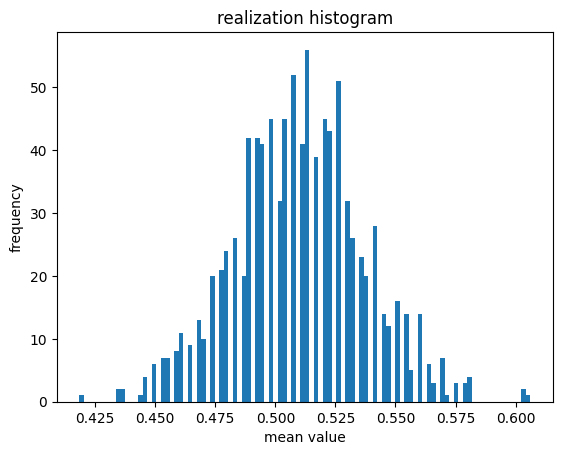

In [106]:
np.random.seed(0)
means = []
for i in range(R):
    x = np.random.binomial(1, p2, size=S)
    mean = np.mean(x)
    means.append(mean)
_ = plt.hist(means, bins=100)
_ = plt.title("realization histogram")
_ = plt.xlabel("mean value")
_ = plt.ylabel("frequency")
_ = plt.show()

The distribution seems to resemble to the middle of the histogram which is around the value of 0.5 to 0.525 range. By just eyeballing the plot, the largest resonalbly common value is 0.515 and the smallest values is 0.425

**7)  Finally, compute 2.5th and 97.5 percentile and the 95% confidence intervals. Does the Q1 poverty value fall into this interval?**

In [107]:
# Compute 2.5th and 97.5th pecentile
pct_2_5 = np.percentile(means, 2.5)
pct_97_5 = np.percentile(means, 97.5)
print("2.5th percentile:", pct_2_5)
print("97.5th percentile:", pct_97_5)
# Compute 95% confidence intervals
mean = np.mean(means)
std_error = stats.sem(means)
ci = stats.norm.interval(0.95, loc=mean, scale=std_error)
print("95% confidence interval:", ci)
# Q1 doesn't fall into the confidence interval range of 0.66 wheras Q2 does.

2.5th percentile: 0.4553846153846154
97.5th percentile: 0.563076923076923
95% confidence interval: (0.5081211793187649, 0.5115095899120042)


### 2.3) Theoretical CI

**1) Compute variance of your sample of X. You can use the Bernoulli variance formula Var X = p(1-p). You can also use the sample you created in 2.2.1, or create a new sample, and find the sample variance.**

In [119]:
S = 325
p2 = 0.51
np.random.seed(0)
x = np.random.binomial(1, p2, size=S)
# compute variance of sample X: Var(x) = p(1-p)
n = len(x)
count_one = x[x == 1].sum()
p = count_one / n
one_minus_p = 1 - p
variance = p * one_minus_p
print("sample variance:", variance)

sample variance: 0.24999763313609466


**2) But this was variance of X (or sample variance if that was what you computed). What we need is variance of sample mean. What does CLT tell about relationship b/w sample variance and variance of the sample mean?**

CLT tells us that as the sample size increases, the distribution of the sample mean becomes approximately normal regardless of the distribution of the original population. Additionaly, the variance of the sample mean is inversely proportional to the sample size. Therefore, as sample size increases, the variance of the sample mean decreases.

In [192]:
np.random.seed(0)
means = []
p2 = 0.51
S = 325
for i in range(R):
    x = np.random.binomial(1, p2, size=S)
    mean = np.mean(x)
    means.append(mean)
population_variance = p2*(1-p2)
sample_variance = population_variance / S
print("Variance of sample mean:", sample_variance)

Variance of sample mean: 0.000768923076923077


**3) Compute the standard deviation of sample mean using CLT.**

In [197]:
np.random.seed(0)
means = []
S = 325
p2 = 0.51
R = 1000

for i in range(R):
    x = np.random.binomial(1, p2, size=S)
    mean = np.mean(x)
    means.append(mean)

population_variance = p2*(1-p2)
sample_variance = population_variance / S
sample_std = np.sqrt(sample_variance)

print("Standard deviation of sample mean:", sample_std)


Standard deviation of sample mean: 0.02772946225448804


**4) Compare the standard deviation you got here with the standard deviation of the sample of averages you computed in 2.2.4.**

In [120]:
np.random.seed(0)
means = []
for i in range(R):
    x = np.random.binomial(1, p2, size=S)
    mean = np.mean(x)
    means.append(mean)
std_of_means = np.std(means)
print("standard deviation of the sample of averages:", std_of_means)

standard deviation of the sample of averages: 0.027321257735696488
0.49230769230769234


**5) Use this standard deviation to compute the confidence interval. Compare it to what you got in 2.2.7. Does p1 falls inside or outside of this interval?**

In [130]:
# compute the standard deviation of the sample means
std_of_means
# compute the 95% confidence interval
# z value for 95% ci = + - 1.96
n = len(means)
sqrt_n = n ** 0.5
sample_mean = np.mean(means)
std_of_means = np.std(means)

# Calculate the confidence interval
ci_lower = sample_mean - 1.96 * (std_of_means / sqrt_n)
ci_upper = sample_mean + 1.96 * (std_of_means / sqrt_n)
# compared to the CI value above, it has same ci values
print("Confidence Interval:", ci_lower, ci_upper)

Confidence Interval: 0.5081219955168728 0.5115087737138964
